In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# load all worksheets into the notebook
transactions_df = pd.read_excel("KPMG_data_module_two.xlsx",sheet_name="Transactions",skiprows=[0])
newCustomerList_df = pd.read_excel("KPMG_data_module_two.xlsx",sheet_name="NewCustomerList",skiprows=[0])
customerDemographic_df = pd.read_excel("KPMG_data_module_two.xlsx",sheet_name="CustomerDemographic",skiprows=[0])
customerAddress_df = pd.read_excel("KPMG_data_module_two.xlsx",sheet_name="CustomerAddress",skiprows=[0])

In [18]:
# so we can view all the columns 
# didn't do rows because my computer sucks
pd.set_option('display.max_columns',None)

In [6]:
transactions_df.shape

(20000, 13)

In [7]:
newCustomerList_df.shape

(1000, 23)

In [8]:
customerDemographic_df.shape

(4000, 13)

In [9]:
customerAddress_df.shape

(3999, 6)

In [10]:
newCustomerList_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [12]:
customerDemographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [13]:
transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [21]:
# merge dataframes on the customer id
customerdemo_transaction_df = pd.merge(transactions_df,customerDemographic_df,how="inner",on='customer_id')

In [22]:
customerdemo_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19996
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19997 non-null  int64         
 1   product_id                           19997 non-null  int64         
 2   customer_id                          19997 non-null  int64         
 3   transaction_date                     19997 non-null  datetime64[ns]
 4   online_order                         19637 non-null  float64       
 5   order_status                         19997 non-null  object        
 6   brand                                19800 non-null  object        
 7   product_line                         19800 non-null  object        
 8   product_class                        19800 non-null  object        
 9   product_size                         19800 non-null  object        
 10  list_price

In [28]:
# sort by transaction date to find out the last transaction date for this dataset
customerdemo_transaction_df.sort_values(by='transaction_date',ascending=False)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,recency
4439,748,80,2865,2017-12-30,1.0,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,41047.0,Lila,Eyeington,Female,11,1997-12-14,Electrical Engineer,Manufacturing,High Net Worth,N,ã,No,3.0,963 days 21:57:58.085181
11869,13575,98,2396,2017-12-30,0.0,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,33364.0,Elmira,Wildblood,Female,40,1973-08-02,Recruiter,Retail,Affluent Customer,N,1;DROP TABLE users,Yes,7.0,963 days 21:57:58.085181
368,3938,95,993,2017-12-30,0.0,Approved,OHM Cycles,Touring,low,medium,1073.07,933.84,35455.0,Reine,Semken,Female,71,1977-02-18,Account Coordinator,Argiculture,High Net Worth,N,/dev/null; touch /tmp/blns.fail ; echo,No,17.0,963 days 21:57:58.085181
4297,19907,41,1721,2017-12-30,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0,Delcine,Hansod,Female,82,1980-10-22,Senior Quality Engineer,Financial Services,High Net Worth,N,0/0,No,14.0,963 days 21:57:58.085181
18636,13670,73,2165,2017-12-30,0.0,Approved,Solex,Standard,medium,medium,1945.43,333.18,37499.0,Marlie,Teesdale,U,16,NaT,Civil Engineer,Manufacturing,Affluent Customer,N,NaN,No,NaN,963 days 21:57:58.085181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,11676,96,1229,2017-01-01,0.0,Approved,WeareA2B,Road,low,small,1172.78,1043.77,33364.0,Sebastian,Trass,Male,38,2000-01-08,GIS Technical Architect,Manufacturing,Affluent Customer,N,-1,Yes,1.0,1326 days 21:57:58.085181
1979,16575,19,1745,2017-01-01,0.0,Approved,OHM Cycles,Road,high,large,12.01,7.21,34115.0,Leigha,Clawson,Female,37,1955-08-23,Chief Design Engineer,Financial Services,Mass Customer,N,ËÉnbá´lÉ ÉuÆÉÉ¯ ÇÉ¹olop ÊÇ ÇÉ¹oqÉl Ên Êunpá´pá...,Yes,6.0,1326 days 21:57:58.085181
11986,9363,62,871,2017-01-01,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,33879.0,Janka,Yesinin,Female,40,1992-01-20,NaN,NaN,Mass Customer,N,â°â´âµ,Yes,5.0,1326 days 21:57:58.085181
11935,11314,4,2068,2017-01-01,1.0,Approved,Solex,Standard,medium,medium,1483.20,99.59,36146.0,Wandie,Nare,Female,23,1956-08-08,Account Representative I,NaN,High Net Worth,N,../../../../../../../../../../../etc/hosts,No,8.0,1326 days 21:57:58.085181


In [30]:
# last date of transactions
last_date = customerdemo_transaction_df['transaction_date'].max()

In [45]:
# find out how recent a customer purchased a product
customerdemo_transaction_df['recency_days']  = last_date - customerdemo_transaction_df['transaction_date']

In [50]:
# change datatype from datetime to string for splitting (next line)
customerdemo_transaction_df['recency_days'] = customerdemo_transaction_df['recency_days'].astype("string")

In [52]:
# split so that we only take the first value
customerdemo_transaction_df['recency_days'] = customerdemo_transaction_df['recency_days'].apply(lambda x: x.split(" ")[0])

In [53]:
customerdemo_transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,recency_days
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,308
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,75
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,248
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,223
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,86


In [55]:
# change datatype from datetime to float for calculations
customerdemo_transaction_df['recency_days'] = customerdemo_transaction_df['recency_days'].astype("float")

In [65]:
# create a column calculating profit by subtracting cost from price
customerdemo_transaction_df['profit'] = customerdemo_transaction_df['list_price'] - customerdemo_transaction_df['standard_cost']

In [66]:
customerdemo_transaction_df.groupby(by='customer_id').sum()

,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date,past_3_years_bike_related_purchases,tenure,recency_days,profit
customer_id,,,,,,,,,,
1,126342,376,6.0,9084.45,6066.36,410455.0,1023,121.0,2204.0,3018.09
2,25415,112,1.0,4149.07,1922.81,116327.0,243,48.0,570.0,2226.26
3,110741,483,1.0,9888.23,6525.42,314802.0,488,120.0,1624.0,3362.81
4,27089,157,1.0,1047.72,827.15,72017.0,66,14.0,466.0,220.57
5,47818,289,2.0,5903.20,3508.26,224166.0,336,48.0,1159.0,2394.94
...,...,...,...,...,...,...,...,...,...,...
3496,41277,123,3.0,4725.38,2679.54,154411.0,396,76.0,1085.0,2045.84
3497,25695,97,2.0,3744.07,2095.75,116041.0,219,54.0,281.0,1648.32
3498,55965,433,5.0,5177.06,2029.73,226342.0,168,30.0,1456.0,3147.33


In [58]:
# create a count of products purchases column
count_productid = customerdemo_transaction_df.groupby(by='customer_id').count()['product_id']

In [62]:
# create a column for the most recent time the customer purchased from Sprocket
min_transaction_days = customerdemo_transaction_df.groupby(by='customer_id')['recency_days'].min()

In [67]:
# find out sum of profit from each customer
sum_profit = customerdemo_transaction_df.groupby(by='customer_id').sum()['profit']

In [68]:
# create a customer dataframe
customer_df = pd.DataFrame({
    "min_recency":min_transaction_days,
    "product_count":count_productid,
    "sum_profit": sum_profit
})

In [69]:
customer_df.head()

,min_recency,product_count,sum_profit
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,8,3362.81
4,195.0,2,220.57
5,16.0,6,2394.94


### RFM Metrics

* recency: time since last order or last engaged with the product
* Total number of transactions or average time between transactions/engaged visits
* total or average transactions value

In [80]:
# finding IQR for recency
Q1_recency = customer_df['min_recency'].quantile(0.25)
median_recency = customer_df['min_recency'].quantile(0.5)
Q3_recency = customer_df['min_recency'].quantile(0.75)
IQR_recency = Q3_recency - Q1_recency
print(Q1_recency)
print(median_recency)
print(Q3_recency)
print(IQR_recency)

17.0
44.0
85.0
68.0


In [81]:
# finding IQR for products purchased
Q1_products = customer_df['product_count'].quantile(0.25)
median_products = customer_df['product_count'].quantile(0.5)
Q3_products = customer_df['product_count'].quantile(0.75)
IQR_products = Q3_products - Q1_products
print(Q1_products)
print(median_products)
print(Q3_products)
print(IQR_products)


4.0
6.0
7.0
3.0


In [93]:
# finding IQR for sum of profit
Q1_profits = customer_df['sum_profit'].quantile(0.25)
median_products = customer_df['sum_profit'].quantile(0.5)
Q3_profits = customer_df['sum_profit'].quantile(0.75)
IQR_profits = Q3_profits - Q1_profits
print(Q1_profits)
print(median_products)
print(Q3_profits)
print(IQR_profits)

1841.73
2862.330000000001
4183.81
2342.0800000000004


In [85]:
# recency_score list
recency_list = []
for a in customer_df['min_recency']:
    if a <= 17:
        recency_list.append(4)
    elif a > 17 and a <= 44:
        recency_list.append(3)
    elif a > 44 and a <= 85:
        recency_list.append(2)
    else:
        recency_list.append(1)

In [87]:
recency_list[:5]

[4, 1, 1, 1, 4]

In [104]:
# product_score list
product_list = []
for a in customer_df['product_count']:
    if a <= 4:
        product_list.append(1)
    elif a > 4 and a <= 6:
        product_list.append(2)
    elif a > 6 and a <= 7:
        product_list.append(3)
    else:
        product_list.append(4)

In [105]:
product_list[:5]

[4, 1, 4, 1, 2]

In [106]:
# product_score list
profit_list = []
for a in customer_df['sum_profit']:
    if a <= 1841.73:
        profit_list.append(1)
    elif a > 1841.73 and a <= 2862.33:
        profit_list.append(2)
    elif a > 2862.33 and a <= 4183.81:
        profit_list.append(3)
    else:
        profit_list.append(4)

In [96]:
customer_df.head()

,min_recency,product_count,sum_profit
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,8,3362.81
4,195.0,2,220.57
5,16.0,6,2394.94


In [97]:
# insert recency score to the second column
customer_df.insert(1, "recency_score", recency_list)

In [110]:
customer_df.insert(3, "product_score", product_list)

In [111]:
customer_df['profit_score'] = profit_list

In [112]:
customer_df.head()

,min_recency,recency_score,product_count,product_score,sum_profit,profit_score
customer_id,,,,,,
1,7.0,4,11,4,3018.09,3
2,128.0,1,3,1,2226.26,2
3,102.0,1,8,4,3362.81,3
4,195.0,1,2,1,220.57,1
5,16.0,4,6,2,2394.94,2


In [113]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 1 to 3500
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   min_recency    3493 non-null   float64
 1   recency_score  3493 non-null   int64  
 2   product_count  3493 non-null   int64  
 3   product_score  3493 non-null   int64  
 4   sum_profit     3493 non-null   float64
 5   profit_score   3493 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 191.0 KB


In [129]:
",".join(map(str,customer_df[['recency_score','product_score',"profit_score"]].values.tolist()[0])).replace(",","")

'443'

In [135]:
RFM_score = []
for i in range(customer_df.shape[0]):    
    rfm_item = customer_df[['recency_score','product_score',"profit_score"]].values.tolist()[i]    
    RFM_score.append(",".join(map(str,rfm_item)).replace(",",""))

In [137]:
customer_df['RFM_score'] = RFM_score

In [138]:
customer_df.head()

,min_recency,recency_score,product_count,product_score,sum_profit,profit_score,RFM_score
customer_id,,,,,,,
1,7.0,4,11,4,3018.09,3,443
2,128.0,1,3,1,2226.26,2,112
3,102.0,1,8,4,3362.81,3,143
4,195.0,1,2,1,220.57,1,111
5,16.0,4,6,2,2394.94,2,422


In [141]:
customer_df['RFM_score'] = customer_df['RFM_score'].astype("float")

In [144]:
# create IQR for the RFM score
Q1_rfm = customer_df['RFM_score'].quantile(0.25)
median_rfm = customer_df['RFM_score'].quantile(0.5)
Q3_rfm = customer_df['RFM_score'].quantile(0.75)
print(Q1_rfm)
print(median_rfm)
print(Q3_rfm)


211.0
311.0
411.0


In [154]:
customer_title = []
for j in customer_df['RFM_score']:
    if j <= 211:
        customer_title.append("Bronze")
    elif j >211 and j <=311:
        customer_title.append("Silver")
    elif j >311 and j <= 411:
        customer_title.append("Gold")
    else:
        customer_title.append("Platinum")

In [156]:
customer_df['customer_title'] = customer_title

In [157]:
customer_df.head()

,min_recency,recency_score,product_count,product_score,sum_profit,profit_score,RFM_score,customer_title
customer_id,,,,,,,,
1,7.0,4,11,4,3018.09,3,443.0,Platinum
2,128.0,1,3,1,2226.26,2,112.0,Bronze
3,102.0,1,8,4,3362.81,3,143.0,Bronze
4,195.0,1,2,1,220.57,1,111.0,Bronze
5,16.0,4,6,2,2394.94,2,422.0,Platinum


In [160]:
customertitle_grouped_df = customer_df.groupby(by='customer_title').count()
customertitle_grouped_df

,min_recency,recency_score,product_count,product_score,sum_profit,profit_score,RFM_score
customer_title,,,,,,,
Bronze,1010,1010,1010,1010,1010,1010,1010
Gold,878,878,878,878,878,878,878
Platinum,792,792,792,792,792,792,792
Silver,813,813,813,813,813,813,813


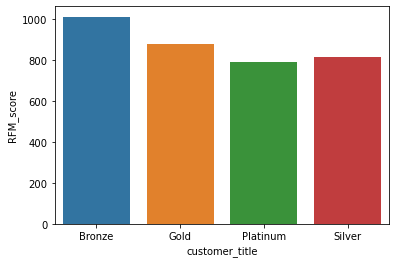

In [161]:
ax = sns.barplot(x=customertitle_grouped_df.index, y= customertitle_grouped_df['RFM_score'])

## Age group analysis

In [162]:
customerdemo_transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,recency_days,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,308.0,17.87
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,75.0,448.68
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,248.0,179.44
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,223.0,1702.55
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,86.0,451.65


In [166]:
customerdemo_transaction_df['transaction_date'].min()

Timestamp('2017-01-01 00:00:00')

In [171]:
customer_age = 2017 - customerdemo_transaction_df['DOB'].dt.year

In [172]:
customerdemo_transaction_df['customer_age'] = customer_age

In [173]:
customerdemo_transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,recency_days,profit,customer_age
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,308.0,17.87,62.0
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,37659.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,75.0,448.68,62.0
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,478.16,298.72,40487.0,Kristos,Anthony,Male,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,248.0,179.44,62.0
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,223.0,1702.55,38.0
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,40649.0,Lauree,O'Donnell,Female,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,86.0,451.65,38.0


In [176]:
customerdemo_transaction_df['customer_age'].sort_values(ascending=False)

5904     174.0
5903     174.0
5910     174.0
5902     174.0
5909     174.0
         ...  
19488      NaN
19489      NaN
19490      NaN
19914      NaN
19915      NaN
Name: customer_age, Length: 19997, dtype: float64

In [174]:
customerdemo_transaction_df.describe()['customer_age']

count    19551.000000
mean        39.922817
std         12.929370
min         15.000000
25%         30.000000
50%         40.000000
75%         49.000000
max        174.000000
Name: customer_age, dtype: float64

In [182]:
# drop the customer who has the wrong DOB 
customerdemo_transaction_df = customerdemo_transaction_df.loc[customerdemo_transaction_df['customer_id']!=34]

In [183]:
customerdemo_transaction_df.describe()['customer_age']

count    19542.000000
mean        39.861068
std         12.608024
min         15.000000
25%         30.000000
50%         40.000000
75%         49.000000
max         86.000000
Name: customer_age, dtype: float64

In [188]:
customerdemo_transaction_df.groupby(by='customer_id')['customer_age'].max()

customer_id
1       64.0
2       37.0
3       63.0
4       56.0
5       40.0
        ... 
3496    31.0
3497    31.0
3498    22.0
3499    38.0
3500    50.0
Name: customer_age, Length: 3492, dtype: float64

In [190]:
customer_df['customer_age'] = customerdemo_transaction_df.groupby(by='customer_id')['customer_age'].max()

In [191]:
customer_df

,min_recency,recency_score,product_count,product_score,sum_profit,profit_score,RFM_score,customer_title,customer_age
customer_id,,,,,,,,,
1,7.0,4,11,4,3018.09,3,443.0,Platinum,64.0
2,128.0,1,3,1,2226.26,2,112.0,Bronze,37.0
3,102.0,1,8,4,3362.81,3,143.0,Bronze,63.0
4,195.0,1,2,1,220.57,1,111.0,Bronze,56.0
5,16.0,4,6,2,2394.94,2,422.0,Platinum,40.0
...,...,...,...,...,...,...,...,...,...
3496,256.0,1,4,1,2045.84,2,112.0,Bronze,31.0
3497,52.0,2,3,1,1648.32,1,211.0,Bronze,31.0
3498,127.0,1,6,2,3147.33,3,123.0,Bronze,22.0


In [195]:
bins = [customer_df['customer_age'].min(),\
        19,29,39,49,59,69,79,customer_df['customer_age'].max()]
labels = ["10-19","20-29","30-39", "40-49", "50-59", "60-69", "70-79", "80+"]

In [197]:
customer_age_groups = pd.cut(customer_df['customer_age'],bins,labels=labels,include_lowest=True)

In [198]:
customer_df['customer_age_group'] = customer_age_groups

In [199]:
customer_df.head(3)

,min_recency,recency_score,product_count,product_score,sum_profit,profit_score,RFM_score,customer_title,customer_age,customer_age_group
customer_id,,,,,,,,,,
1,7.0,4,11,4,3018.09,3,443.0,Platinum,64.0,60-69
2,128.0,1,3,1,2226.26,2,112.0,Bronze,37.0,30-39
3,102.0,1,8,4,3362.81,3,143.0,Bronze,63.0,60-69


In [207]:
customer_df.groupby(by="customer_age_group").count()

,min_recency,recency_score,product_count,product_score,sum_profit,profit_score,RFM_score,customer_title,customer_age
customer_age_group,,,,,,,,,
10-19,196,196,196,196,196,196,196,196,196
20-29,607,607,607,607,607,607,607,607,607
30-39,825,825,825,825,825,825,825,825,825
40-49,952,952,952,952,952,952,952,952,952
50-59,601,601,601,601,601,601,601,601,601
60-69,230,230,230,230,230,230,230,230,230
70-79,3,3,3,3,3,3,3,3,3
80+,2,2,2,2,2,2,2,2,2


In [213]:
age_group_demographic = customer_df['customer_age_group'].value_counts().sort_index()

In [214]:
age_group_demographic

10-19    196
20-29    607
30-39    825
40-49    952
50-59    601
60-69    230
70-79      3
80+        2
Name: customer_age_group, dtype: int64

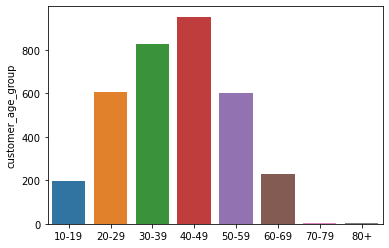

In [215]:
sns.barplot(x = age_group_demographic.index, y= age_group_demographic)

find new customer demographics

In [223]:
newCustomerList_df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.650000,0.650000,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997,997,0.357000


In [78]:
# # create equal bins
# recency_bins = np.linspace(min(customer_df['min_recency']),max(customer_df['min_recency']),5)
# # set group names
# recency_groups = [1,2,3,4]

# pd.cut(customer_df['min_recency'],recency_bins,labels=recency_groups,include_lowest=True).unique()
# recency_bins

[1, 2, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]